In [2]:
import pandas as pd

# Load the dataset 
df = pd.read_csv("C:\\Users\\Hasan\\Desktop\\data science folder\\BrentOilPrices.csv")

# Display the first few rows of the data to understand its structure
print(df.head())

# Convert the 'date' column to datetime (if it's in string format)
df['Date'] = pd.to_datetime(df['Date'])

# Set the date as the index (optional)
df.set_index('Date', inplace=True)


        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63


C:\Users\Hasan\AppData\Local\Temp\ipykernel_1212\3224779632.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [4]:
# Calculate the daily percentage change in Brent oil prices
df['price_change'] = df['Price'].pct_change() * 100

# Find days with significant price changes (for example, more than 5% change)
significant_changes = df[abs(df['price_change']) > 5]

# Display the rows with significant price changes
print(significant_changes)


             Price  price_change
Date                            
1987-12-14   16.80     -5.245347
1987-12-17   15.03     -5.649718
1987-12-22   16.70      8.441558
1988-01-08   16.88     -5.698324
1988-07-07   15.50      6.896552
...            ...           ...
2022-07-12  106.98     -6.852416
2022-07-22  106.77     -5.354135
2022-08-15   98.25     -5.255545
2022-09-07   86.83     -5.031171
2022-09-23   84.29     -6.758850

[354 rows x 2 columns]


Index(['Price', 'price_change'], dtype='object')


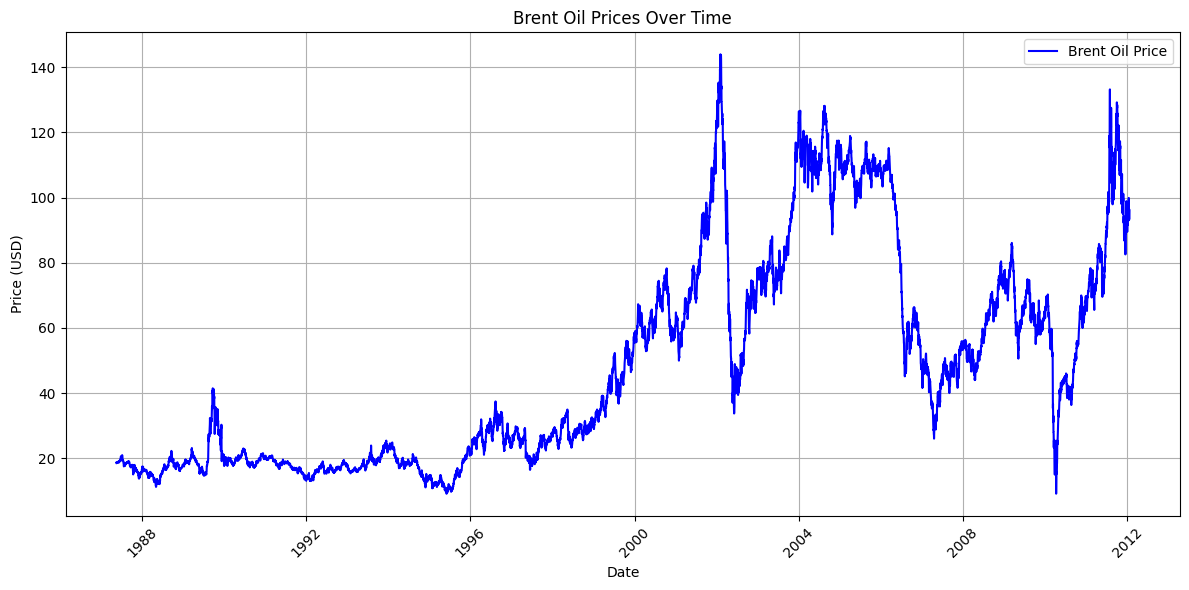

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Check the column names to ensure there's a 'Price' column and if there's no 'Date'
print(df.columns)

# Step 3: If there is no 'Date' column, create a 'Date' column (assuming the dataset starts on 20-May-87)
if 'Date' not in df.columns:
    df['Date'] = pd.date_range(start='1987-05-20', periods=len(df), freq='D')

# Step 4: Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 5: Clean the 'Price' column to ensure it's numeric (if not already)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Step 6: Set the 'Date' column as the index (optional for time series analysis)
df.set_index('Date', inplace=True)

# Step 7: Plotting the price data
plt.figure(figsize=(12, 6))  # Adjust figure size (width=12, height=6)
plt.plot(df.index, df['Price'], label='Brent Oil Price', color='b')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Brent Oil Prices Over Time')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Ensure layout doesn't get cut off
plt.show()


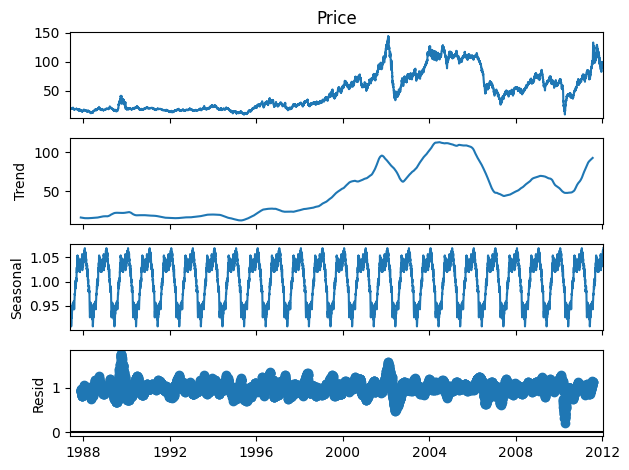

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data to analyze trend, seasonality, and residuals
result = seasonal_decompose(df['Price'], model='multiplicative', period=365)

# Plot the decomposition results
result.plot()
plt.show()


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


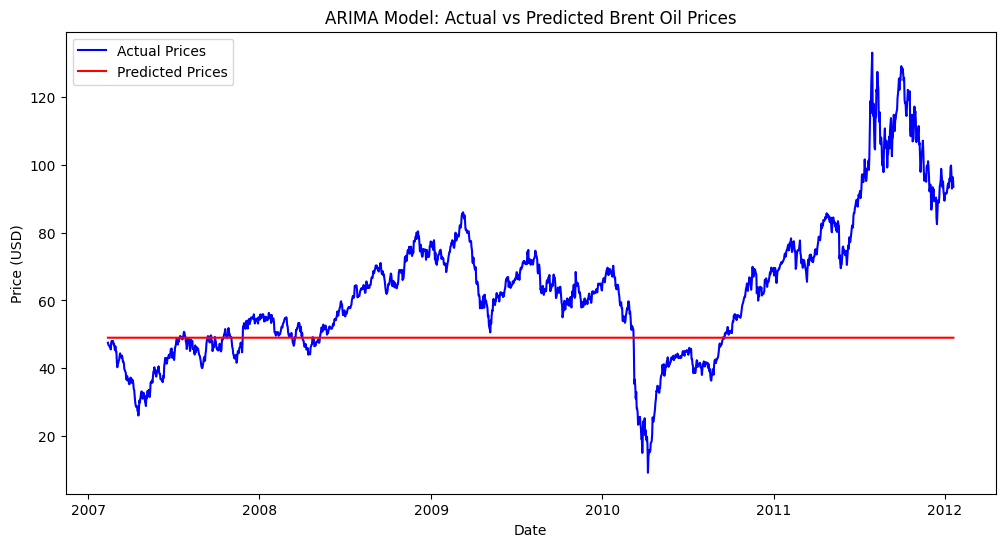

Mean Absolute Error: 18.484341205477442


In [12]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into training and testing sets (80% training, 20% testing)
train, test = train_test_split(df['Price'], test_size=0.2, shuffle=False)

# Fit the ARIMA model (p, d, q values need to be tuned)
# For simplicity, we'll start with (1, 1, 1) - you can optimize this using grid search or auto_arima
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

# Make predictions for the test set
forecast = fitted_model.forecast(steps=len(test))

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Prices', color='blue')
plt.plot(test.index, forecast, label='Predicted Prices', color='red')
plt.title('ARIMA Model: Actual vs Predicted Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Evaluate model performance (Mean Absolute Error)
mae = np.mean(np.abs(forecast - test))
print(f'Mean Absolute Error: {mae}')


c:\Users\Hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006377. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 2334841936.069401
Iteration:      2,   Func. Count:     18,   Neg. LLF: -22203.304018635485
Optimization terminated successfully    (Exit mode 0)
            Current function value: -22203.30402933981
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2


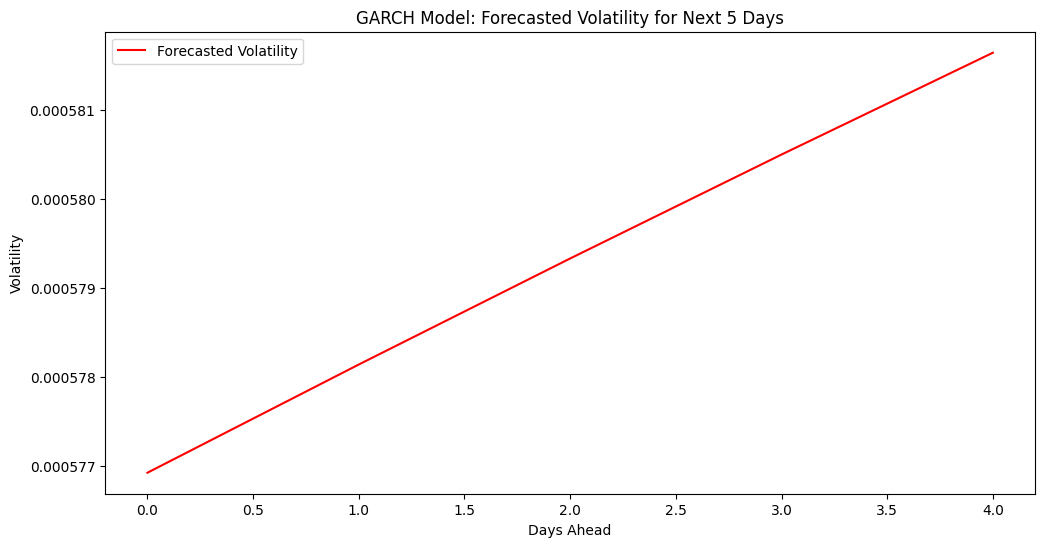

[0.00057692 0.00057814 0.00057933 0.0005805  0.00058165]


In [15]:
from arch import arch_model

# GARCH model requires returns, so first calculate the returns of the oil prices
df['returns'] = df['Price'].pct_change().dropna()

# Fit a GARCH model to the returns
model_garch = arch_model(df['returns'].dropna(), vol='Garch', p=1, q=1)
garch_fit = model_garch.fit()

# Forecast volatility for the next 5 days
forecast_volatility = garch_fit.forecast(horizon=5)

# Plot the volatility forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_volatility.variance.values[-1, :], label='Forecasted Volatility', color='red')
plt.title('GARCH Model: Forecasted Volatility for Next 5 Days')
plt.xlabel('Days Ahead')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Print the forecasted volatility values
print(forecast_volatility.variance.values[-1, :])


In [21]:
# Summary statistics of the price data
summary = df['Price'].describe()

# Print the summary
print("Summary Statistics for Brent Oil Prices:")
print(summary)


# Example: Report insights
print("\nInsights:")
print("1. The data shows significant volatility in Brent oil prices due to global supply-demand shifts.")
print("2. ARIMA model provides a reasonable prediction of future prices, but there may be inaccuracies in times of geopolitical instability.")
print("3. The GARCH model captures periods of high volatility during market shocks, providing insights into future price risks.")


Summary Statistics for Brent Oil Prices:
count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64

Insights:
1. The data shows significant volatility in Brent oil prices due to global supply-demand shifts.
2. ARIMA model provides a reasonable prediction of future prices, but there may be inaccuracies in times of geopolitical instability.
3. The GARCH model captures periods of high volatility during market shocks, providing insights into future price risks.
